## Statistique inférentielle - Théorie de l'estimation - Exercice 12.1

(Dé)Montrez numériquement que la variance d'échantillon est un estimateur biaisé 
de la variance de la population.

Contrainte forte: n'utilisez PAS de librairie ou de package pour le calcul direct de la variance.
Au lieu de cela, repartez des formules de base (voir Slide 52) et faites le calcul à la mano :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

Nous partirons donc d'une population globale de nombres distribuée de manière gaussienne centrée sur zéro et d'écart-type 1, contenant 100000 valeurs.

In [2]:
population_size = 100000
sigma = 1
center = 0

population_df = pd.DataFrame()
population_df['valeur'] = np.random.normal(size=population_size, loc=center, scale=sigma)

Au sein de cette population fixée, nous allons tiré 5000 échantillons de taille 50 sans remplacement et, pour chaque échantillon, calculer la moyenne et la médiane.

A quoi ressemble cette distribution. Faisons un histogramme.

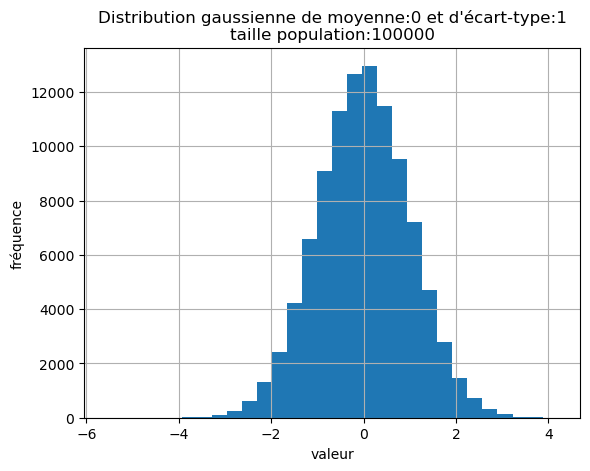

In [3]:
n_bins = 30

population_df['valeur'].hist(bins=n_bins)
plt.title("Distribution gaussienne de moyenne:{} et d'écart-type:{}\ntaille population:{}".format(center, sigma**2, population_size))
plt.xlabel('valeur')
plt.ylabel('fréquence')
plt.show()

In [4]:
random.seed(4242)

n_samples = 500
sample_size = 5

sorted_population = sorted(population_df['valeur'].values)

var_list = []
var_corr_list = []
for i_sample in range(0,n_samples):
    sample_list = random.sample(sorted_population, sample_size)
    moy = np.mean(sample_list)
    sum = 0
    for valeur in sample_list:
        sum += (valeur-moy)**2
    var = sum/sample_size
    var_list.append(var)
    var_corr = var*sample_size/(sample_size-1)
    var_corr_list.append(var_corr)

Dessinons un histogramme de ces valeurs, en indiquant la moyenne par une barre verticale.

In [5]:
estimateur_df = pd.DataFrame()
estimateur_df['s^2'] = var_list
estimateur_df['s chapeau^2'] = var_corr_list

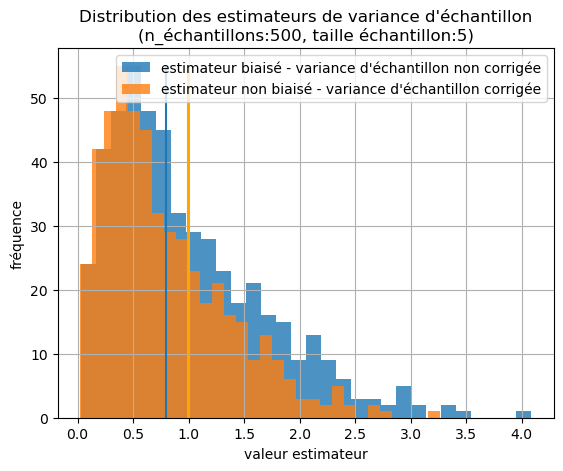

In [6]:
estimateur_df['s chapeau^2'].hist(label="estimateur biaisé - variance d'échantillon non corrigée", alpha=0.8, bins=n_bins)
plt.vlines(estimateur_df['s chapeau^2'].mean(), ymin=0, ymax=np.histogram(estimateur_df['s chapeau^2'], bins=30)[0].max(), color='orange')
estimateur_df['s^2'].hist(label="estimateur non biaisé - variance d'échantillon corrigée", alpha=0.8, bins=n_bins)
plt.vlines(estimateur_df['s^2'].mean(), ymin=0, ymax=np.histogram(estimateur_df['s^2'], bins=n_bins)[0].max())

plt.title("Distribution des estimateurs de variance d'échantillon\n(n_échantillons:{}, taille échantillon:{})".format(n_samples,sample_size))
plt.xlabel('valeur estimateur')
plt.ylabel('fréquence')
plt.legend()
plt.show()